opened file for ticker:  TSLA
Under 0 restriction: 
The average profit margin is -0.12%
The sum of profit or loss from long postion is -45.05
The sum of profit or loss from short postion is -130.07


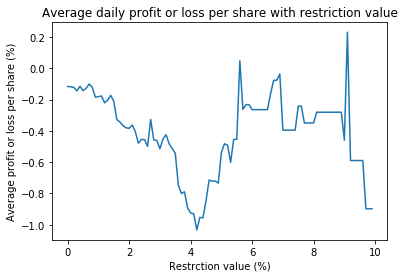

Under optimal restrction: 
The average profit per share is 0.23% under the restrction value 9.1%
The sum of profit or loss from long postion is 5.39
The sum of profit or loss from short postion is -2.86


In [165]:
import os
import numpy as np
from matplotlib import pyplot as plt

ticker ='TSLA'
ticker_file = os.path.join(ticker + '.csv')


def stock_strategy(p):
    
    row = 2
    cost = 100
    account = 0
    long_pf = []
    short_pf = [] 
    
    for i in table_arr[2:]:
        open_td = float(i[7])
        adj_close_td = float(i[12])
        adj_close_ytd = float(table_arr[row-1][12])

        if (open_td - adj_close_ytd) / adj_close_ytd > p:
            # buy in and sell at the end of the day
            p_or_l = (cost/open_td)*(adj_close_td - open_td)
            long_pf.append(p_or_l)
            account += p_or_l
            row += 1

        elif (adj_close_ytd - open_td) / adj_close_ytd > p:
            # sell short
            p_or_l = (cost/open_td)*(open_td - adj_close_td)
            short_pf.append(p_or_l)
            account += p_or_l
            row += 1

        else:
            row += 1
           
    # Average daily profit
    count = len(long_pf) + len(short_pf)
    dp = (account / count) / 100 * 100
    
    # long and short position
    long_sum = np.sum(long_pf)
    short_sum = np.sum(short_pf)
    
    return {"dp": dp, "long_sum": long_sum, "short_sum": short_sum}


try:   
    with open(ticker_file) as f:
        lines = f.read().splitlines()
    print('opened file for ticker: ', ticker)
    table = [line.split(",") for line in lines]
    table_arr = np.array(table).reshape(1511,16)
   
    # Question 1 Average daily profit
    print("Under 0 restriction: ")
    p_zero = 0
    zero_strt = stock_strategy(p_zero)
    dp_zero = stock_strategy(p_zero)["dp"]
    print(f"The average profit margin is {round(dp_zero, 2)}%")

    # Question 2 Long and short position under zero restriction
    long_zero = zero_strt["long_sum"]
    short_zero = zero_strt["short_sum"]
    print("The sum of profit or loss from long postion is", round(long_zero, 2))
    print("The sum of profit or loss from short postion is", round(short_zero, 2))
    
    # Question 3 find the threshold
    restriction = []
    total_dp = []
    
    for p in np.arange(0, 0.1, 0.001):
        restriction.append(100 * p)
        dp_p = stock_strategy(p)["dp"]
        total_dp.append(dp_p)
    
    # plot the results
    plt.plot(restriction, total_dp)
    plt.title("Average daily profit or loss per share with restriction value")
    plt.xlabel("Restrction value (%)")
    plt.ylabel("Average profit or loss per share (%)")
    plt.savefig("threshold_plot.pdf")
    plt.show()
    
    # find the optimal restriction value
    dp_max = max(total_dp)
    dp_max_index = total_dp.index(dp_max)
    opt_restrction = restriction[dp_max_index]
    print("Under optimal restrction: ")
    print(f"The average profit per share is {round(dp_max,3)}% under the restrction value {opt_restrction}%")

    # long position and short position under optimal restriction
    opt_p = opt_restrction / 100
    opt_strt = stock_strategy(opt_p)
    long_pos = opt_strt["long_sum"]
    short_pos = opt_strt["short_sum"]
    print("The sum of profit or loss from long postion is", round(long_pos, 2))
    print("The sum of profit or loss from short postion is", round(short_pos, 2))
    
    
except Exception as e:
    print(e)
    print('failed to read stock data for ticker: ', ticker)


# Analysis

From the graph above, the optimal restriciton value is 9.1%. With the restriction, it buys stock when the overnight return is increased over 9.1% and it sells short when the overnight return is decreased over 9.1%. In other cases, it does not take actions. Given that strategy, the average profit per share is 0.23%, which is much higher than the average profit per share under no restrction, -0.12%. Either under the optimal restriction or the zero restriction, the results show that long position, buying, is more profitable than short position, selling short. It is possible because the big picture of Tesla's stock trending is promising.